In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import SimpleITK as sitk
import radiomics 
from radiomics import featureextractor,imageoperations
import six,numpy as np
import os
import csv

In [2]:
settings = {}
settings['correctMask'] = True
settings['geometryTolerance'] = 1.000000e-06
params = os.path.join(os.getcwd(), '..', 'examples', 'exampleSettings', 'Params.yaml')

In [3]:
# image

imgpath = '/Users/hwang/Documents/research/1_MM/Data/2_benign_MM/T1_norm_niigz/'
imgfile = os.listdir(imgpath)
imgfile.sort()
num_img = len(imgfile)
for item_img in os.listdir(imgpath):
    current_img = os.path.basename(item_img)
    if current_img == '.DS_Store':
        fullpath = os.path.join(imgpath,current_img)
        os.remove(fullpath)
                    
# mask
            
maskpath = '/Users/hwang/Documents/research/1_MM/Data/2_benign_MM/T1_norm_niigz/'
maskfile = os.listdir(maskpath)
maskfile.sort()
num_mask = len(maskfile)
count_mask = 0
for item_mask in os.listdir(maskpath):
    current_mask = os.path.basename(item_mask)
    if current_mask == '.DS_Store':
        fullpath = os.path.join(maskpath,current_mask)
        os.remove(fullpath)    

In [223]:
# when error occurs: Bounding box of ROI is larger than image space

num = 0
for item_mask in os.listdir(maskpath):

    i = sitk.ReadImage(os.path.join(imgpath,imgfile[num]))
    j = sitk.ReadImage(os.path.join(maskpath,maskfile[num]))

    j.SetDirection(i.GetDirection())
    j.SetOrigin(i.GetOrigin())
    j.SetSpacing(i.GetSpacing())

    sitk.WriteImage(j,os.path.join(maskpath,maskfile[num]),True)
    num = num + 1

In [220]:
num = 9

i = sitk.ReadImage(os.path.join(imgpath,imgfile[num]))
j = sitk.ReadImage(os.path.join(maskpath,maskfile[num]))

j.SetDirection(i.GetDirection())
j.SetOrigin(i.GetOrigin())
j.SetSpacing(i.GetSpacing())

sitk.WriteImage(j,os.path.join(maskpath,maskfile[num]),True)

In [5]:
num = 0  
img = sitk.ReadImage(os.path.join(imgpath,imgfile[num]))
# img = sitk.Cast(img, sitk.sitkUInt16)
mask = sitk.ReadImage(os.path.join(maskpath,maskfile[num]))
mask = sitk.Cast(mask, sitk.sitkUInt16)
boundingBox, correctedMask = imageoperations.checkMask(img,mask,**settings)
extractor = featureextractor.RadiomicsFeatureExtractor(params)
result = extractor.execute(img,mask)
with open('/Users/hwang/Documents/research/1_MM/pyradiomics/radiomics_T1norm_ISS.csv', 'w') as file: 
    w = csv.DictWriter(file, result.keys())
    w.writeheader()
    w.writerow(result)
    num = num + 1

for item_mask in os.listdir(maskpath):
    img = sitk.ReadImage(os.path.join(imgpath,imgfile[num]))
    # img = sitk.Cast(img, sitk.sitkUInt16)
    mask = sitk.ReadImage(os.path.join(maskpath,maskfile[num]))
    mask = sitk.Cast(mask, sitk.sitkUInt16)
    boundingBox, correctedMask = imageoperations.checkMask(img,mask,**settings)
    extractor = featureextractor.RadiomicsFeatureExtractor(params)
    result = extractor.execute(img,mask)
    with open('//Users/hwang/Documents/research/1_MM/pyradiomics/radiomics_T1norm_ISS.csv', 'a') as file: 
        w = csv.DictWriter(file, result.keys())
        w.writerow(result)
        num = num + 1
        if num > len(maskfile)-1:
            break

In [6]:
print(num)
# print(len(maskfile)-1)
print(os.path.join(imgpath,imgfile[num]))
print(os.path.join(maskpath,maskfile[num]))

484
/Users/hwang/Documents/research/1_MM/Data/2_benign_MM/T1_norm_niigz/ffMD_31130575_norm.nii.gz
/Users/hwang/Documents/research/1_MM/Data/2_benign_MM/roi_niigz/ffMD_31130575_roi.nii.gz


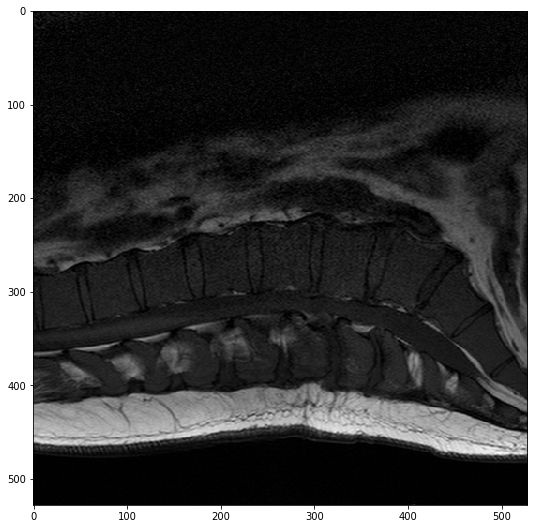

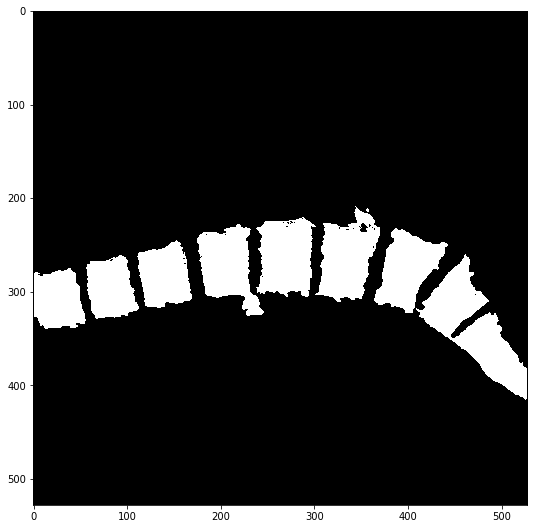

In [7]:
i = sitk.ReadImage(os.path.join(imgpath,imgfile[num]))
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(i)[9,:,:], cmap="gray")
plt.show()

j = sitk.ReadImage(os.path.join(maskpath,maskfile[num]))
plt.figure(figsize=(20,20))
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(j)[9,:,:], cmap = "gray")
plt.show()

In [8]:
print(j.GetPixelIDTypeAsString())
print(j.GetDirection())

64-bit float
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [219]:
print(num)
print(os.path.join(imgpath,imgfile[num]))
print(os.path.join(maskpath,maskfile[num]))
# print(type(correctedMask))
print(img.GetSize())
print(mask.GetSize())
#print(correctedMask.GetSize())
print(img.GetOrigin())
print(mask.GetOrigin())
#print(correctedMask.GetOrigin())
print(img.GetSpacing())
print(mask.GetSpacing())
#print(correctedMask.GetSpacing())
print(img.GetDirection())
print(mask.GetDirection())
#print(correctedMask.GetDirection())

7
/Users/hwang/Documents/research/1_MM/2_benign_MM/T1_norm_niigz/ffHC042_11377898_norm.nii.gz
/Users/hwang/Documents/research/1_MM/2_benign_MM/roi_niigz/ffHC042_11377898_roi.nii.gz
(528, 528, 19)
(528, 528, 19)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.5303030014038086, 0.5303030014038086, 3.0)
(0.6696428656578064, 0.6696428656578064, 3.299999952316284)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
